# Pour ce processus, je réalise la visualisation, l'analyse et le clustering des données sur les clients du crédit allemand.

# Installation et importation des bibliothèques et packages nécessaires pour ce processus

In [2]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import os
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
import plotly.graph_objects as go


import category_encoders as ce

plt.style.use('seaborn-colorblind')
%matplotlib inline

<ipython-input-5-040836ff0f20>:24: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Lecture des données

In [7]:
# read data into dataframe and showing 5 data
df =  pd.read_csv('/content/german_credit_data.csv', index_col=0)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


**Description des données** Dans ce dataset, on trouve :
* 1000 lignes de données avec 9 colonnes
* Des données manquantes dans les colonnes "saving accounts" et "checking accounts"  
* 4 colonnes de type entier et 5 colonnes de type objet

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


**Description du dataset** Dans le tableau de description du dataset ci-dessous, on trouve les valeurs statistiques pour chaque colonne :

* Count (Nombre de données) : 1000 pour chaque colonne
* Mean (Valeur moyenne) : Age=35.5, Job=1.9, Crédit amount=3271.26, Duration=20.9
* Écart-type : Age=11.38, Job=0.65, Crédit amount=2822.74, Duration=12.06  
* Min (Valeur minimale) : Age=19, Job=0, Crédit amount=250, Duration=4
* 25% ou 1er quartile : Age=27, Job=2, Crédit amount=1365, Duration=12
* 50% ou 2e quartile (médiane) : Age=33, Job=2, Crédit amount=2319, Duration=18
* 75% ou 3e quartile : Age=27, Job=2, Crédit amount=1365, Duration=18
* Max (Valeur maximale) : Age=75, Job=3, Crédit amount=18424, Duration=72

In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


**Description du dataset** Description du dataset pour les données de type objet :

* Count (Nombre de données) : 1000 pour chaque colonne, sauf pour Saving accounts=817 et Checking account=606
* Unique (Nombre de valeurs uniques par colonne) : Sex=2, Housing=3, Saving accounts=4, Checking account=3, Purpose=8
* Top (Valeur la plus fréquente) : Sex=male, Housing=own, Saving accounts=little, Checking account=little et Purpose=car
* Freq (Fréquence de la valeur Top) : Sex=690, Housing=713, Saving accounts=603, Checking account=274 et Purpose=337

In [10]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


**Affichage des valeurs uniques de chaque colonne**

In [11]:
print('Nilai Unik Sex/Gender:', df['Sex'].unique())
print('')
print('Nilai Unik Housing/Status Tinggal:', df['Housing'].unique())
print('')
print('Nilai Unik Saving accounts/Uang Tabungan:', df['Saving accounts'].unique())
print('')
print('Nilai Unik Checking account/Tabungan Giro:', df['Checking account'].unique())
print('')
print('Nilai Unik Checking Purpose/Tujuan', df['Purpose'].unique())

Nilai Unik Sex/Gender: ['male' 'female']

Nilai Unik Housing/Status Tinggal: ['own' 'free' 'rent']

Nilai Unik Saving accounts/Uang Tabungan: [nan 'little' 'quite rich' 'rich' 'moderate']

Nilai Unik Checking account/Tabungan Giro: ['little' 'moderate' nan 'rich']

Nilai Unik Checking Purpose/Tujuan ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


**Division des données** Dans ce processus, je divise les données : les données de type catégorique/objet sont stockées dans la variable categorical et les données de type entier dans la variable numeric.  


In [12]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# EDA

**Vérification des données manquantes**
Il y a 183 données manquantes dans la colonne Saving account et 394 données manquantes dans la colonne Checking amount, tandis que les autres colonnes ne contiennent pas de données manquantes.


In [13]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Revoyons les valeurs uniques dans les colonnes saving accounts et checking account car il y a des données manquantes dans ces deux colonnes.

In [14]:
print('Data Uik saving accounts:', df['Saving accounts'].unique())
print('Data Unik checking account:', df['Checking account'].unique())

Data Uik saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Data Unik checking account: ['little' 'moderate' nan 'rich']


Je remplis ces données manquantes avec l'étiquette 'unknown' (inconnue).

In [15]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Visualisation 1

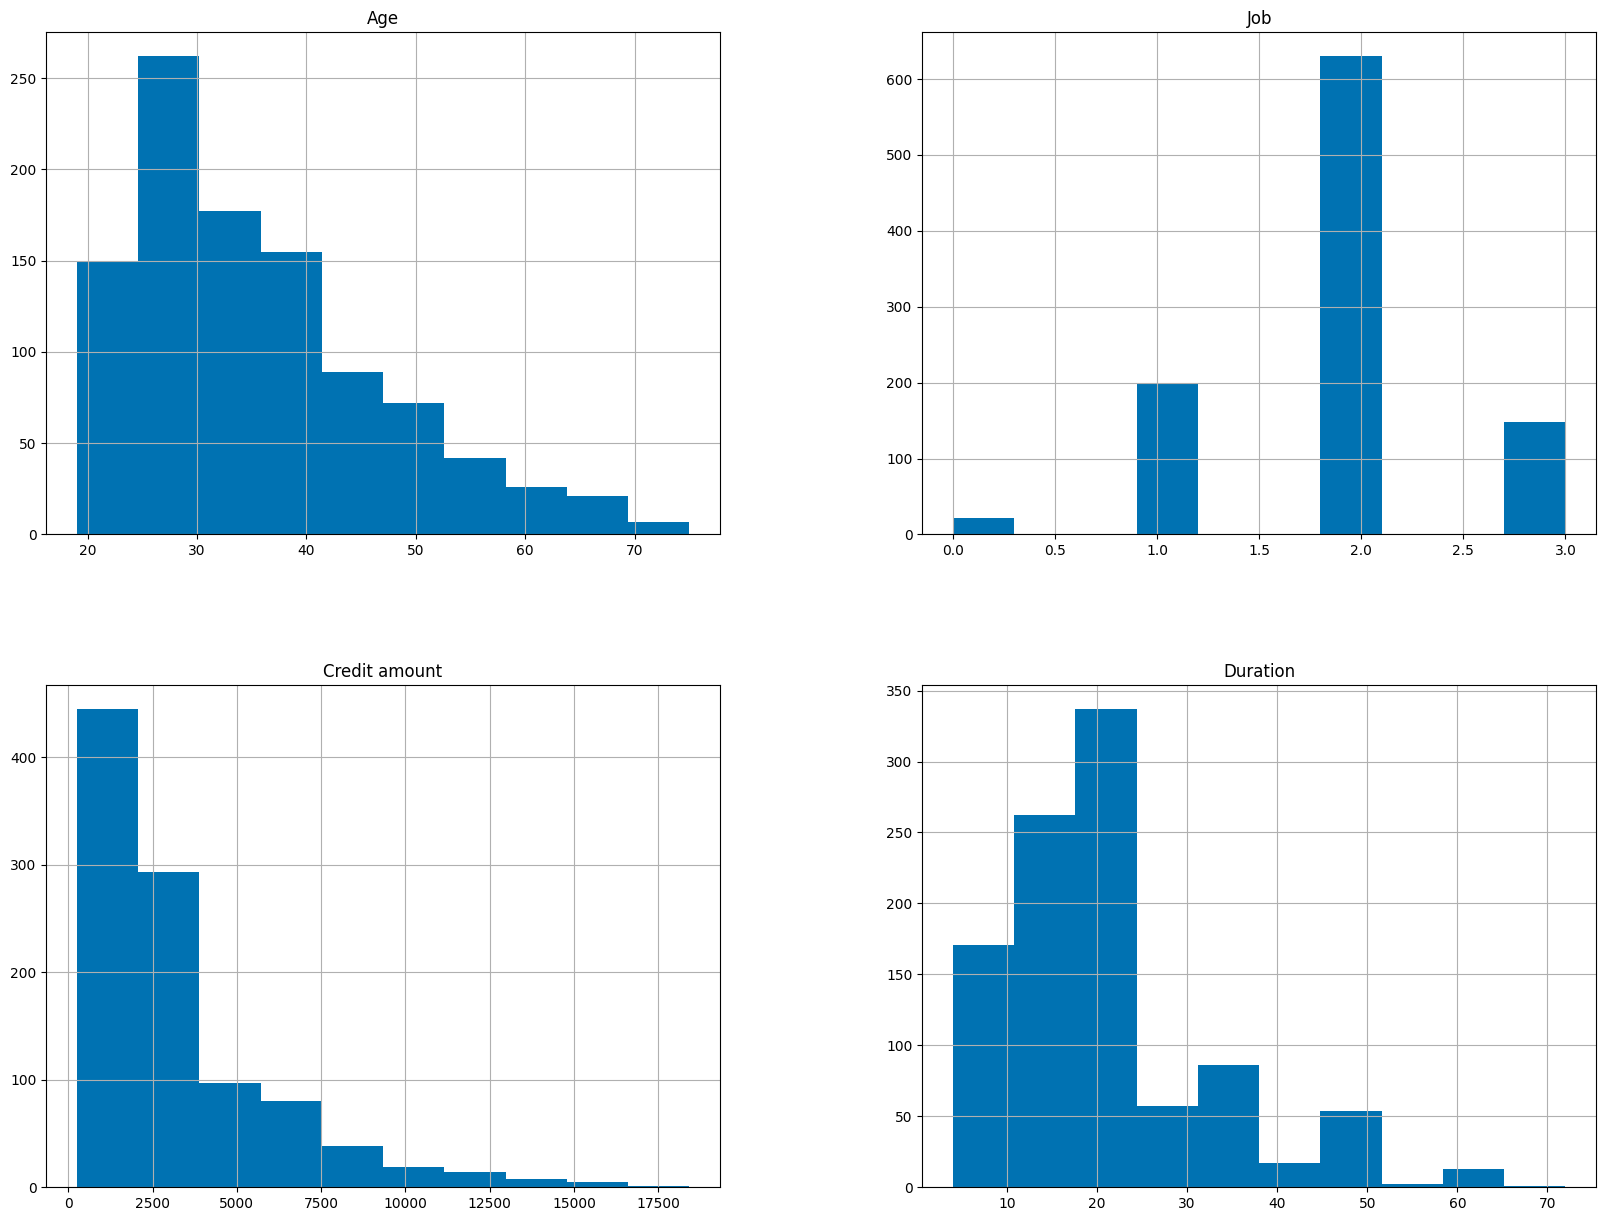

In [16]:
df.hist(figsize = (20,15));

Dans cette première visualisation, je crée des graphiques pour les données numériques : les colonnes age, job, credit amount et duration. On observe :
* Sur le graphique age, il y a un pic entre 20 et 25 ans et entre 25 et 40 ans qui représente l'âge le plus fréquent, puis le graphique diminue avec l'âge.
* Sur le graphique job, l'étiquette 2 est prédominante avec plus de 600 occurrences.
* Sur le graphique Credit amount, la plupart des montants sont compris entre 0 et 3000, et plus le montant augmente, moins il y a d'occurrences.
* Sur le graphique duration, la plupart des durées choisies par les clients vont de 2 à 25 mois, au-delà il y a beaucoup moins d'occurrences avec une différence significative.

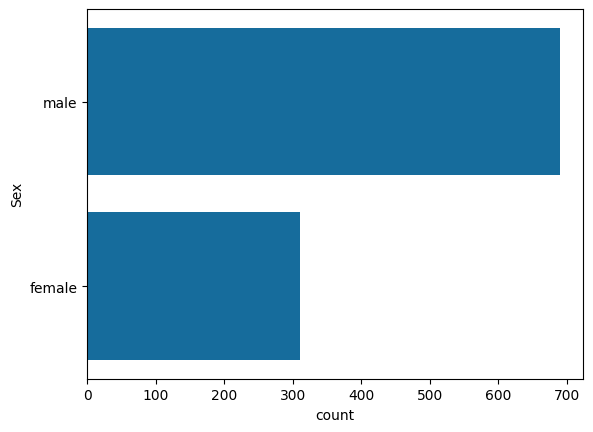

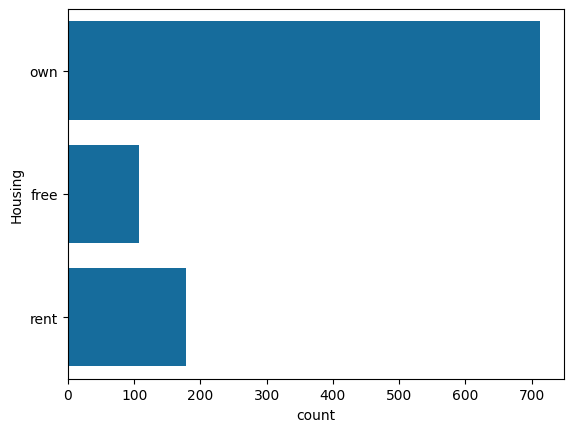

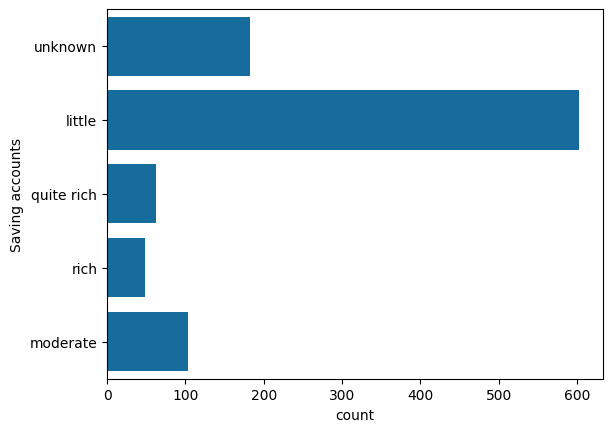

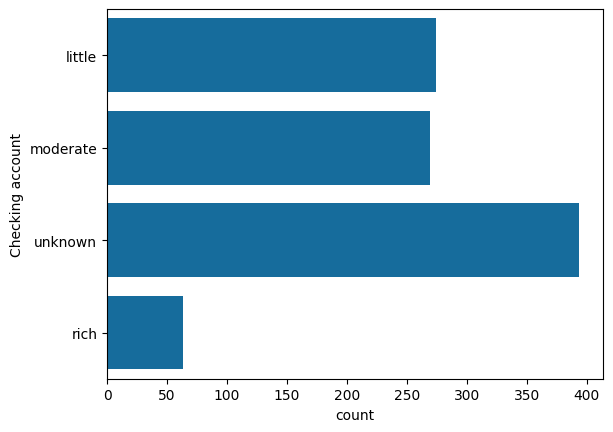

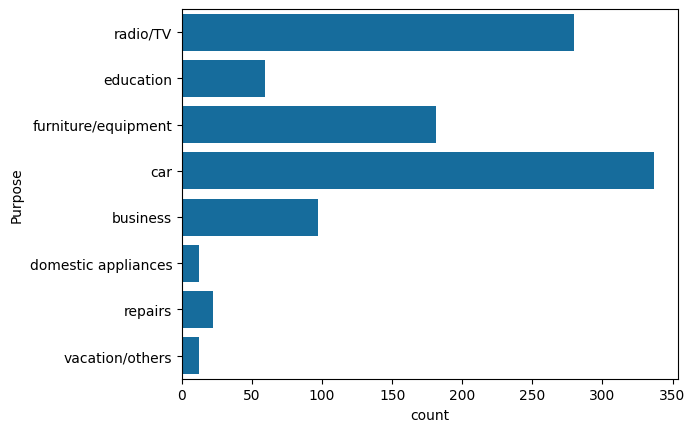

In [17]:
for col in df[categorical].columns:
    sns.countplot(y =col, data = df)
    plt.show()

Dans cette première visualisation, je crée également des graphiques pour les données catégorielles : les colonnes sex, housing, saving accounts, checking account et purpose. On observe :
* Attribut Sex/Genre : les clients de crédit bancaire sont majoritairement des hommes dans un rapport d'environ 7:3.
* Attribut Housing/Logement : la plupart des clients de crédit bancaire possèdent leur propre logement, dans un rapport d'environ 7:1:2 (propriétaire:gratuit:location).
* Attribut Saving accounts/Épargne : les clients de crédit bancaire ont principalement peu d'épargne.
* Attribut Checking accounts/Comptes courants : le statut de la plupart des clients de crédit bancaire est inconnu.  
* Attribut Purpose : l'objectif principal des clients de crédit bancaire est l'achat d'une voiture, suivi par l'achat d'un poste radio/TV, de meubles/équipements et pour des raisons professionnelles.


# Correlation Matrix

Dans ce processus, j'utilise un tableau graphique de corrélation matricielle pour connaître la corrélation entre chaque colonne/variable de caractéristiques. Il existe également un contraste de couleurs pour découvrir la corrélation. Plus la couleur est corrélée, plus elle sera lumineuse.

In [54]:
data = df.copy()

# Encode

Dans ce processus, les données de type catégorique/objet sont encodées en entiers.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical:
    data[label] = encoder.fit_transform(data[label])

In [24]:
data[categorical]

,Sex,Housing,Saving accounts,Checking account,Purpose
0,1,1,4,0,5
1,0,1,0,1,5
2,1,1,0,3,3
3,1,0,0,0,4
4,1,0,0,0,1
...,...,...,...,...,...
995,0,1,0,3,4
996,1,1,0,0,1
997,1,1,0,3,5
998,1,0,0,0,5


# Normalisation

Ce processus normalise les données à l'aide d'un StandardScaler.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.745131,-1.236478,1.073263
1,-1.191404,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,0.949817,2.248194,1.073263
2,1.183312,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.416562,-0.738668,0.061705
3,0.831502,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.634247,1.750384,0.567484
4,1.535122,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.566664,0.256953,-0.949853


# Clustering  

Ce processus effectue le clustering des données.

In [26]:
X = data

**Recherche de la valeur de K** Pour trouver la valeur de K à utiliser comme nombre de clusters, la méthode de la courbe du coude (inertie plot-elbow method) est employée, et on obtient K=4.


In [ ]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

**K-Means** Ce processus définit l'algorithme d'apprentissage automatique K-Means avec K=4 et stocke les résultats du clustering dans une nouvelle colonne 'Cluster'.

In [27]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,3
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


**Répartition des données clusterisées** Ce processus affiche la répartition des données après le clustering : le nombre et le pourcentage de données par cluster.

In [29]:
cluster_size = df.groupby(['Cluster'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Cluster,size,Percentage
0,0,160,0.160
1,1,393,0.393
2,2,187,0.187
3,3,260,0.260


**Description des données après clustering** Ce processus affiche la répartition descriptive des données en fonction des clusters.  

In [30]:
df.groupby('Cluster').describe()

Age                                                        Job  \
         count       mean        std   min   25%   50%   75%   max  count   
Cluster                                                                     
0        160.0  37.243750  12.104756  21.0  28.0  34.0  44.0  75.0  160.0   
1        393.0  35.340967  10.389888  20.0  27.0  33.0  41.0  74.0  393.0   
2        187.0  40.171123  11.516357  20.0  32.0  38.0  48.0  75.0  187.0   
3        260.0  31.484615  10.802355  19.0  24.0  28.0  35.0  67.0  260.0   

                   ... Credit amount          Duration                        \
             mean  ...           75%      max    count       mean        std   
Cluster            ...                                                         
0        2.368750  ...       9882.75  18424.0    160.0  38.975000  12.020920   
1        1.811705  ...       2993.00   7393.0    393.0  17.068702   8.117936   
2        1.903743  ...       3597.50  14555.0    187.0  19.288770   9.866966   
3        1.757692  ...       2848.50   8471.0    260.0  16.738462   7.691497   

                                       
         min    25%   50%   75%   max  
Cluster                                
0        6.0  35.25  36.0  48.0  72.0  
1        4.0  12.00  15.0  24.0  45.0  
2        4.0  12.00  18.0  24.0  48.0  
3        4.0  12.00  15.0  24.0  48.0  

[4 rows x 32 columns]

**Bining** Ce processus effectue un binning sur la colonne age en divisant les données en 3 groupes : adolescents, adultes et seniors.

In [36]:
age_labels = ['Adolescent', 'Mature', 'Âgé']

# Code here
df['Age label'] = pd.qcut((df['Age']), 3, labels=age_labels)

**Groupement** Ce processus regroupe les données en fonction de la colonne Age binée.  

In [37]:
cols = ['Age']

# Code here
groupby_age = df.groupby('Age label')[cols].mean()
groupby_age['Median'] = df.groupby('Age label')[cols].median()
groupby_age['Max'] = df.groupby('Age label')[cols].max()
groupby_age['Min'] = df.groupby('Age label')[cols].min()


groupby_age

,Age,Median,Max,Min
Age label,,,,
Adolescent,24.766467,25.0,28,19
Mature,33.251445,33.0,38,29
Âgé,49.278125,47.0,75,39


D'après le tableau, on observe :
* Pour le groupe des adolescents : âge moyen 25 ans, médiane 25, maximum 28, minimum 19.
* Pour le groupe des adultes : âge moyen 33 ans, médiane 33, maximum 38, minimum 29.
* Pour le groupe des seniors : âge moyen 49 ans, médiane 47, maximum 75, minimum 39.  

**Dataframe final** Affichage du dataframe final après le binning de la colonne 'Age label' et le clustering dans la colonne 'Cluster'.

In [38]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,Age label
0,67,male,2,own,unknown,little,1169,6,radio/TV,2,Âgé
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,Adolescent
2,49,male,1,own,little,unknown,2096,12,education,1,Âgé
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,Âgé
4,53,male,2,free,little,little,4870,24,car,0,Âgé
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,3,Mature
996,40,male,3,own,little,little,3857,30,car,0,Âgé
997,38,male,2,own,little,unknown,804,12,radio/TV,1,Mature
998,23,male,2,free,little,little,1845,45,radio/TV,0,Adolescent


# Résultats du clustering

Cluster 0

<Axes: xlabel='count', ylabel='Age label'>

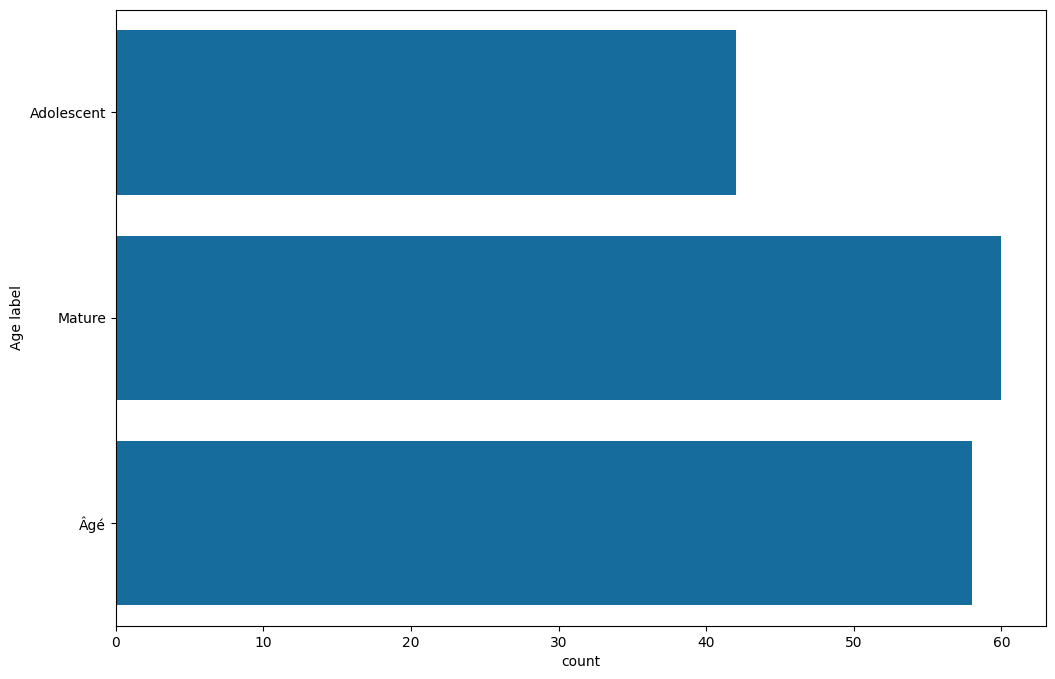

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Age label', data = df[df['Cluster']==0])

<Axes: xlabel='count', ylabel='Duration'>

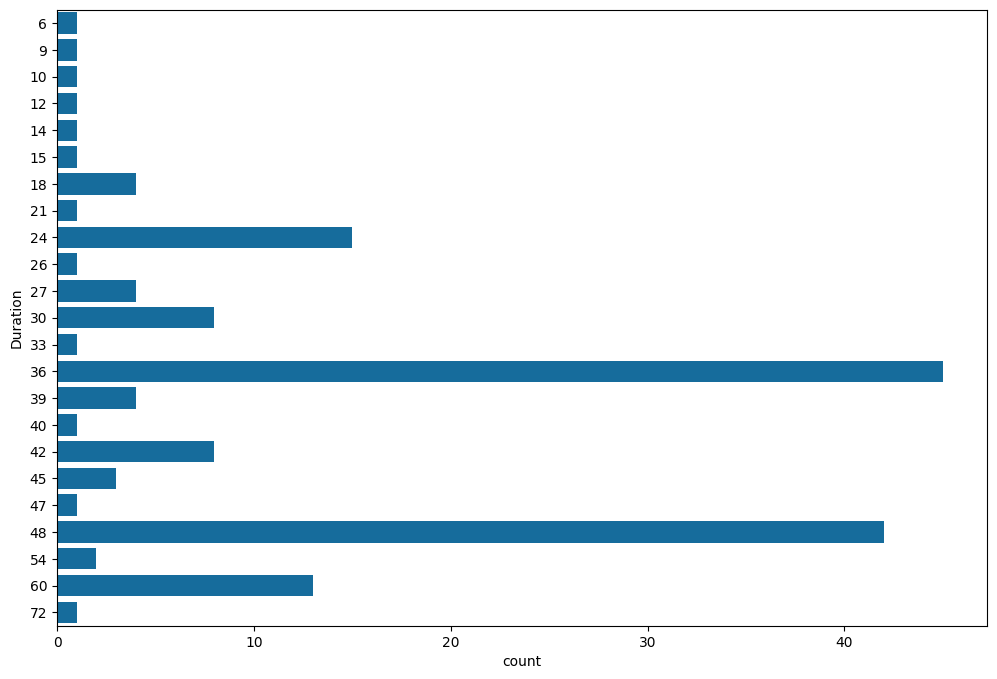

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Duration', data = df[df['Cluster']==0])

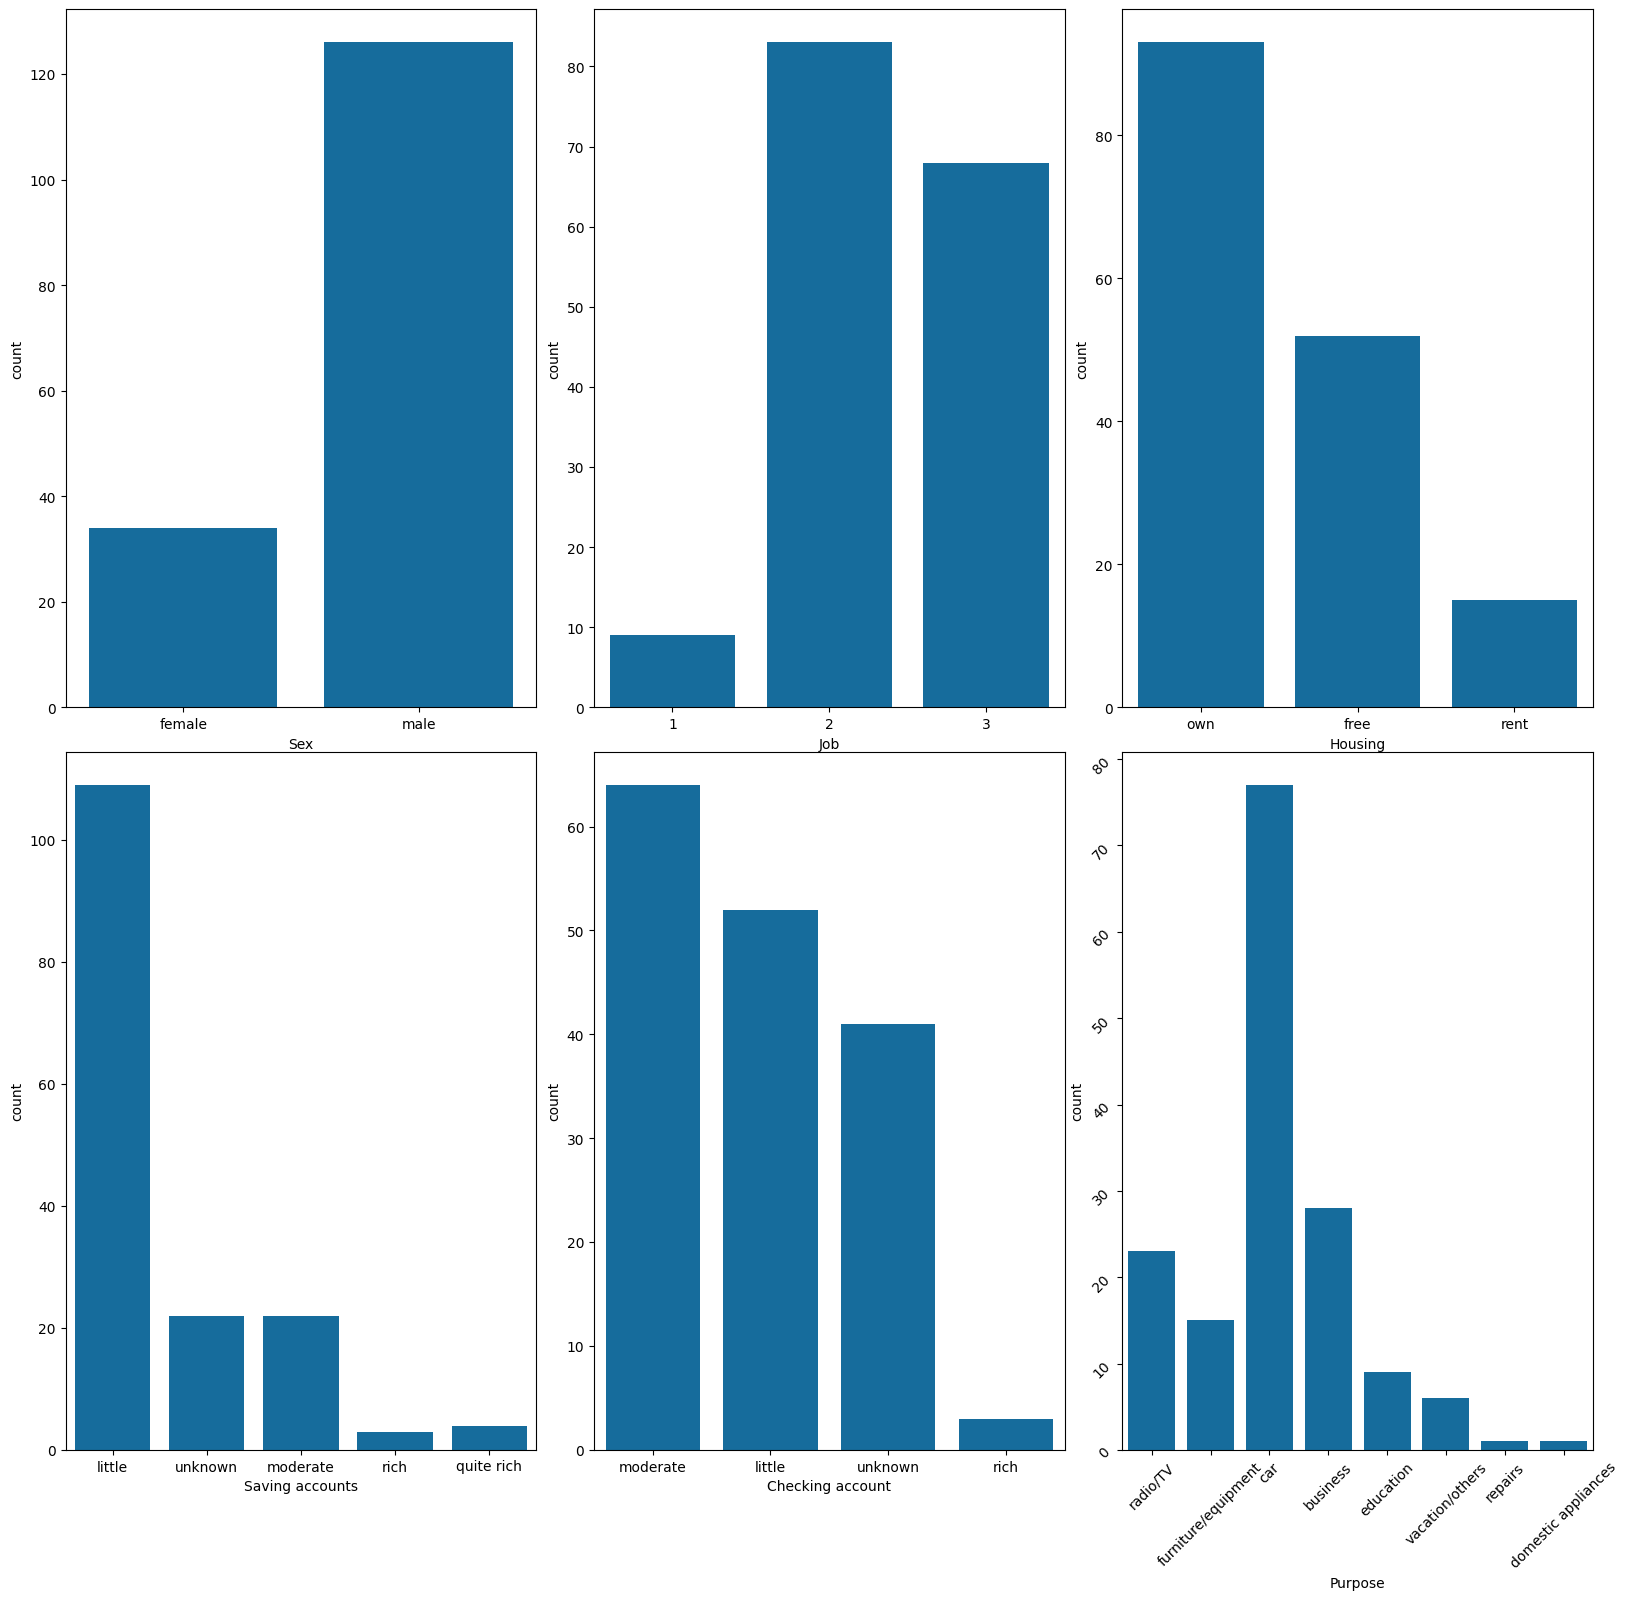

In [42]:
fig, ax = plt.subplots(2,3,figsize=(16,15))
plt.tight_layout()

sns.countplot(x ='Sex', data = df[df['Cluster']==0], ax=ax[0][0])
sns.countplot(x ='Job', data = df[df['Cluster']==0], ax=ax[0][1])
sns.countplot(x ='Housing', data = df[df['Cluster']==0], ax=ax[0][2])
sns.countplot(x ='Saving accounts', data = df[df['Cluster']==0], ax=ax[1][0])
sns.countplot(x ='Checking account', data = df[df['Cluster']==0], ax=ax[1][1])
sns.countplot(x ='Purpose', data = df[df['Cluster']==0], ax=ax[1][2].tick_params(labelrotation=45))
plt.show()

Cluster 1

<Axes: xlabel='count', ylabel='Age label'>

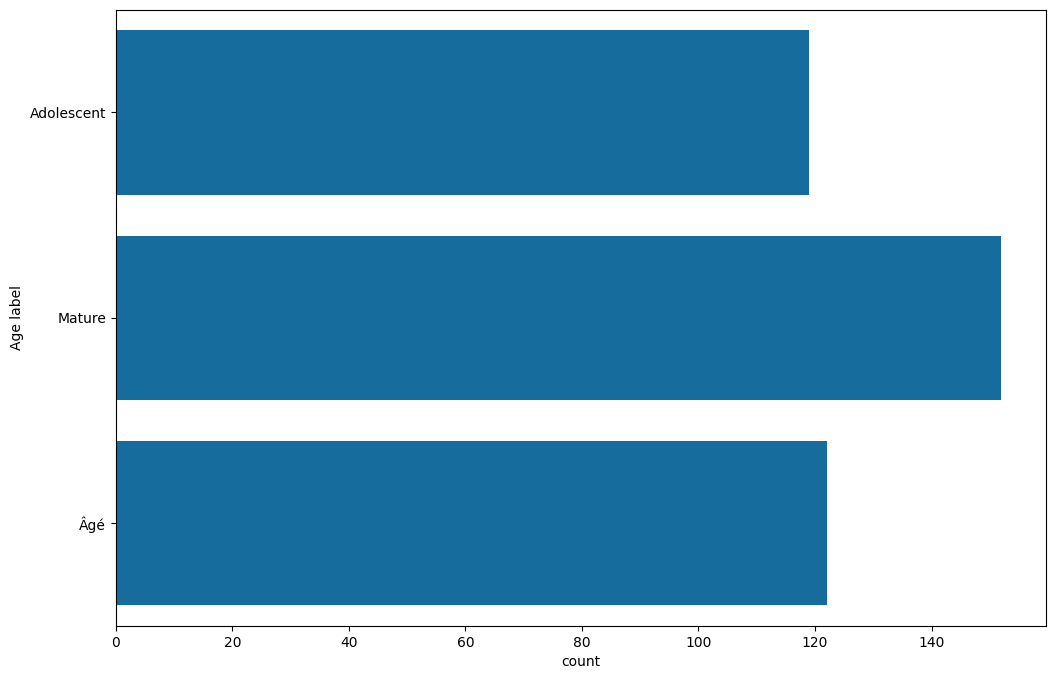

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Age label', data = df[df['Cluster']==1])

<Axes: xlabel='count', ylabel='Duration'>

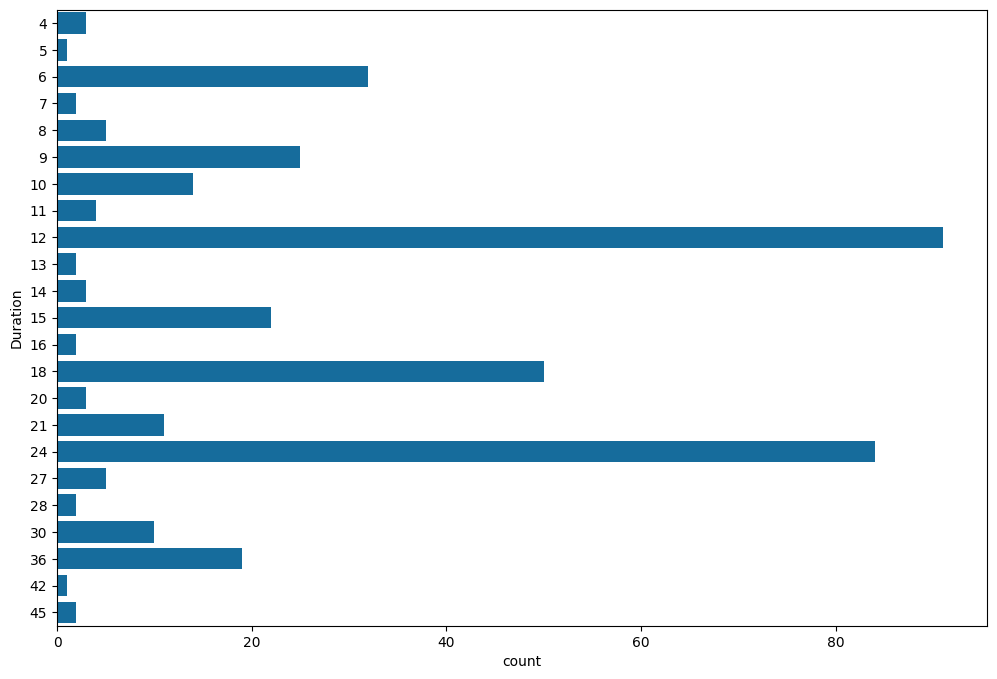

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Duration', data = df[df['Cluster']==1])

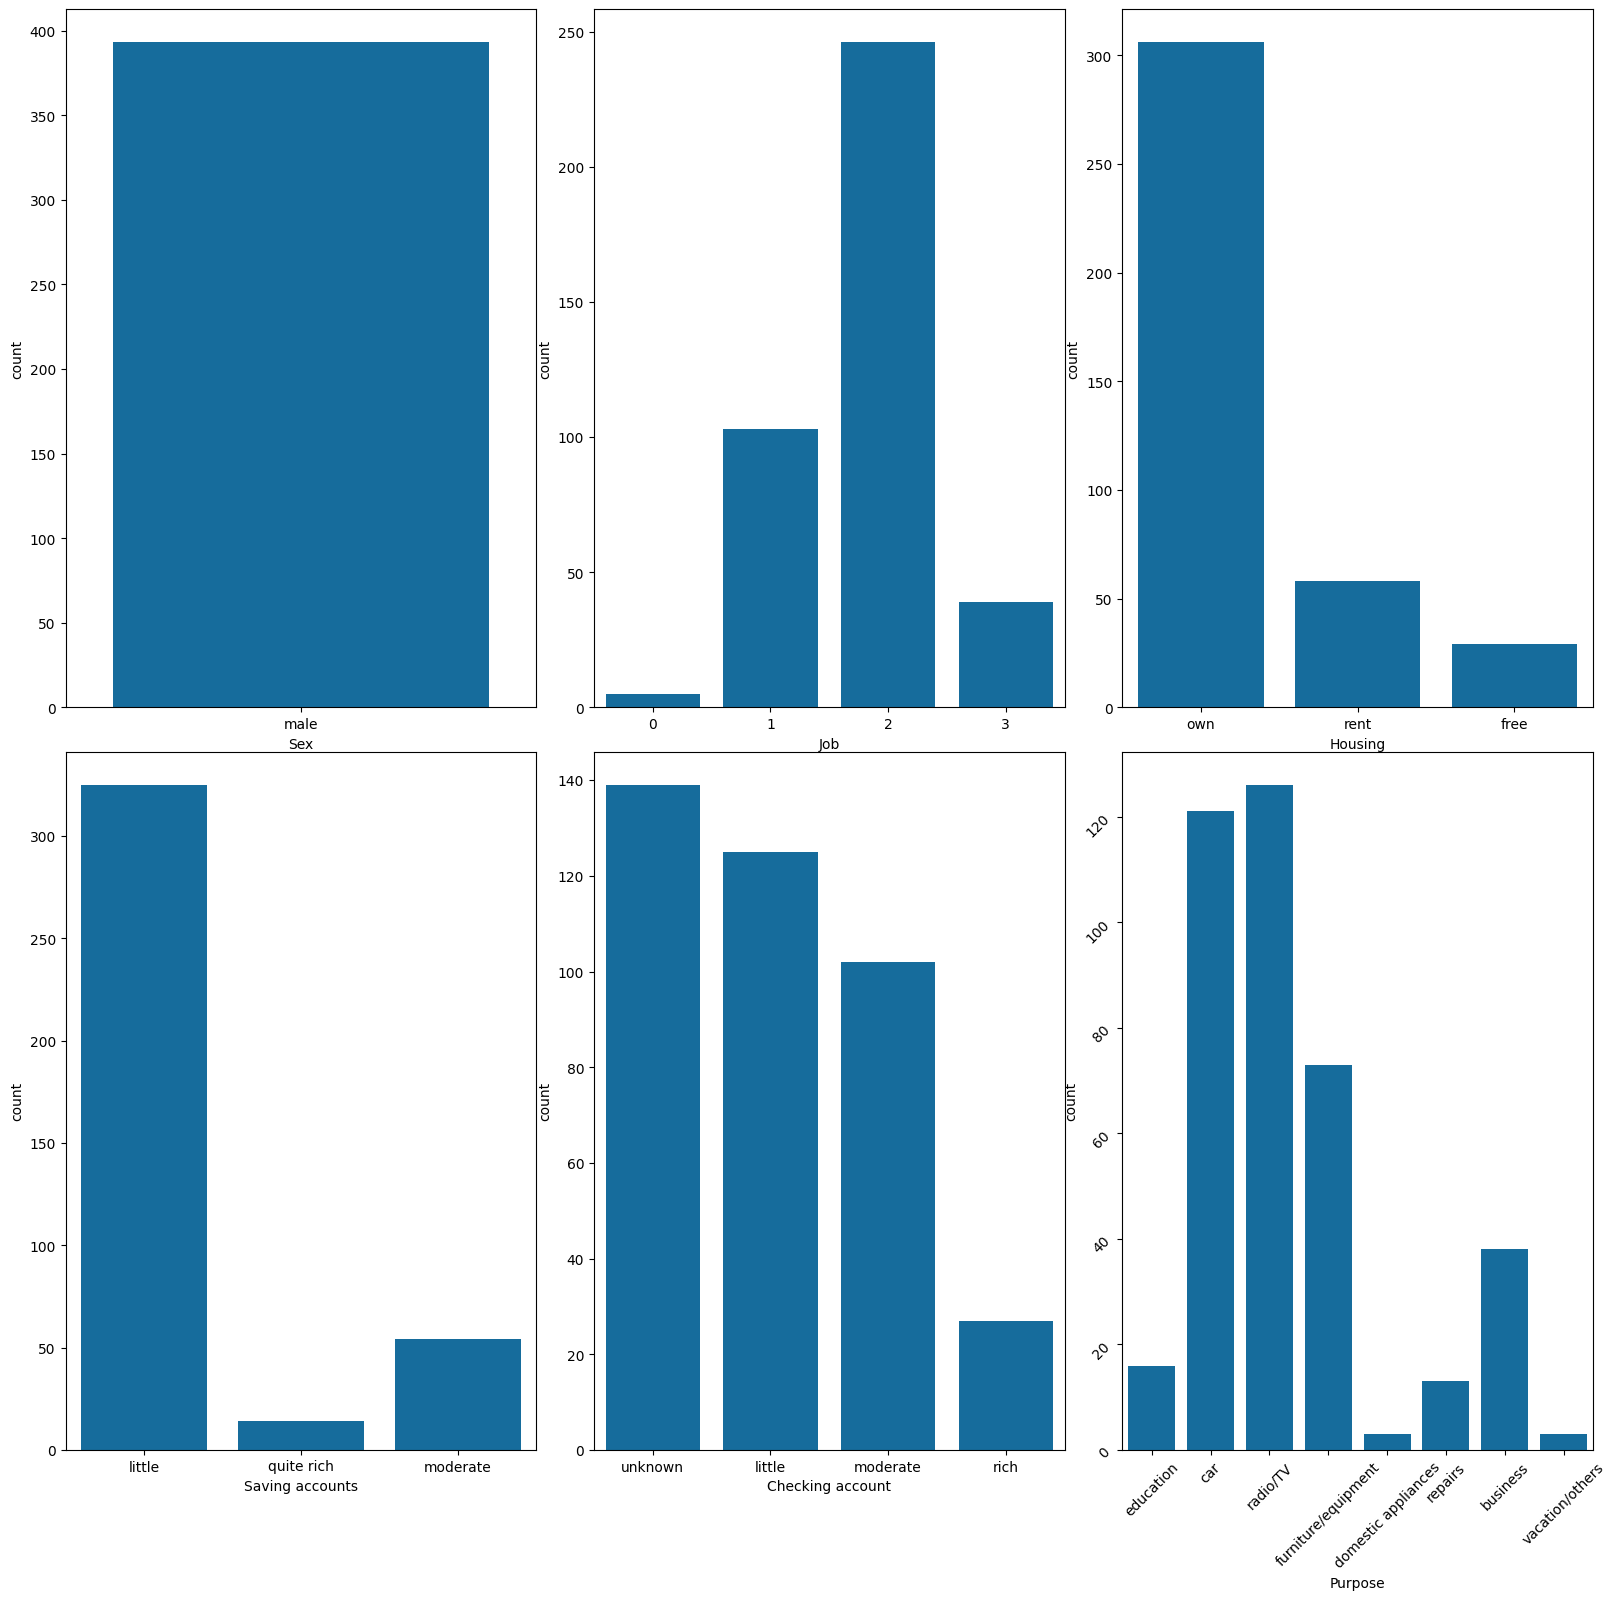

In [46]:
fig, ax = plt.subplots(2,3,figsize=(16,15))
plt.tight_layout()

sns.countplot(x ='Sex', data = df[df['Cluster']==1], ax=ax[0][0])
sns.countplot(x ='Job', data = df[df['Cluster']==1], ax=ax[0][1])
sns.countplot(x ='Housing', data = df[df['Cluster']==1], ax=ax[0][2])
sns.countplot(x ='Saving accounts', data = df[df['Cluster']==1], ax=ax[1][0])
sns.countplot(x ='Checking account', data = df[df['Cluster']==1], ax=ax[1][1])
sns.countplot(x ='Purpose', data = df[df['Cluster']==1], ax=ax[1][2].tick_params(labelrotation=45))
plt.show()

Cluster 2

<Axes: xlabel='count', ylabel='Age label'>

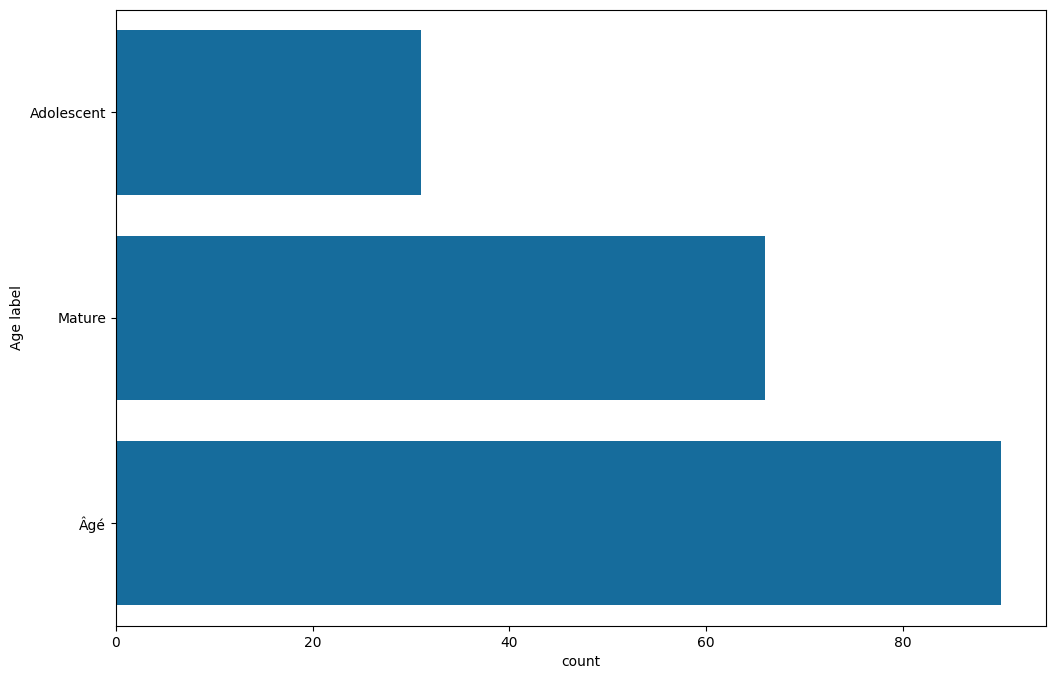

In [47]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Age label', data = df[df['Cluster']==2])

<Axes: xlabel='count', ylabel='Duration'>

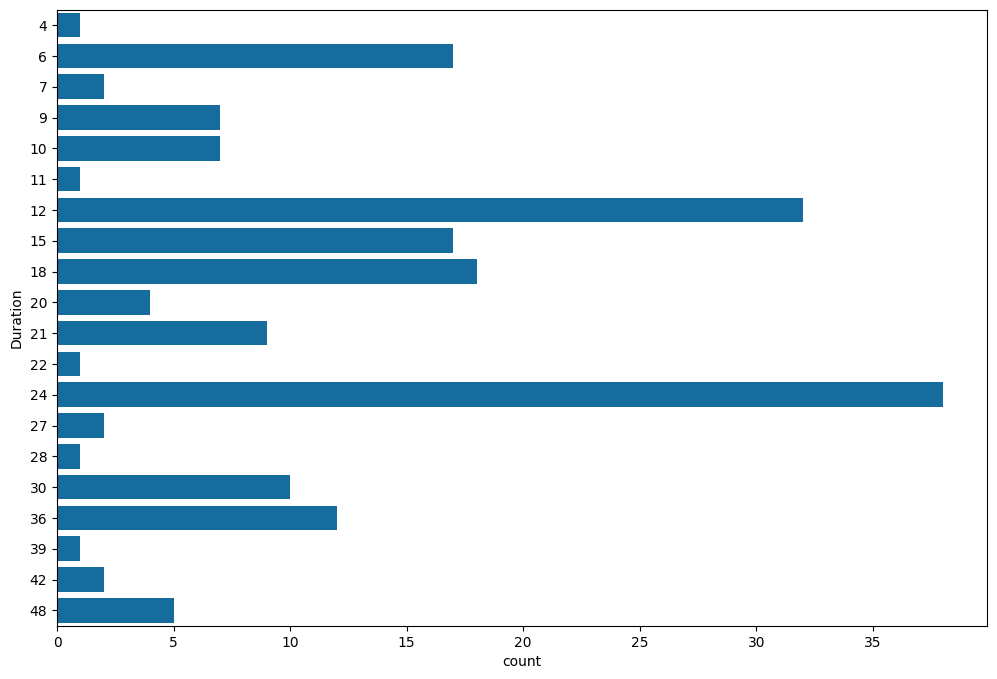

In [48]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Duration', data = df[df['Cluster']==2])

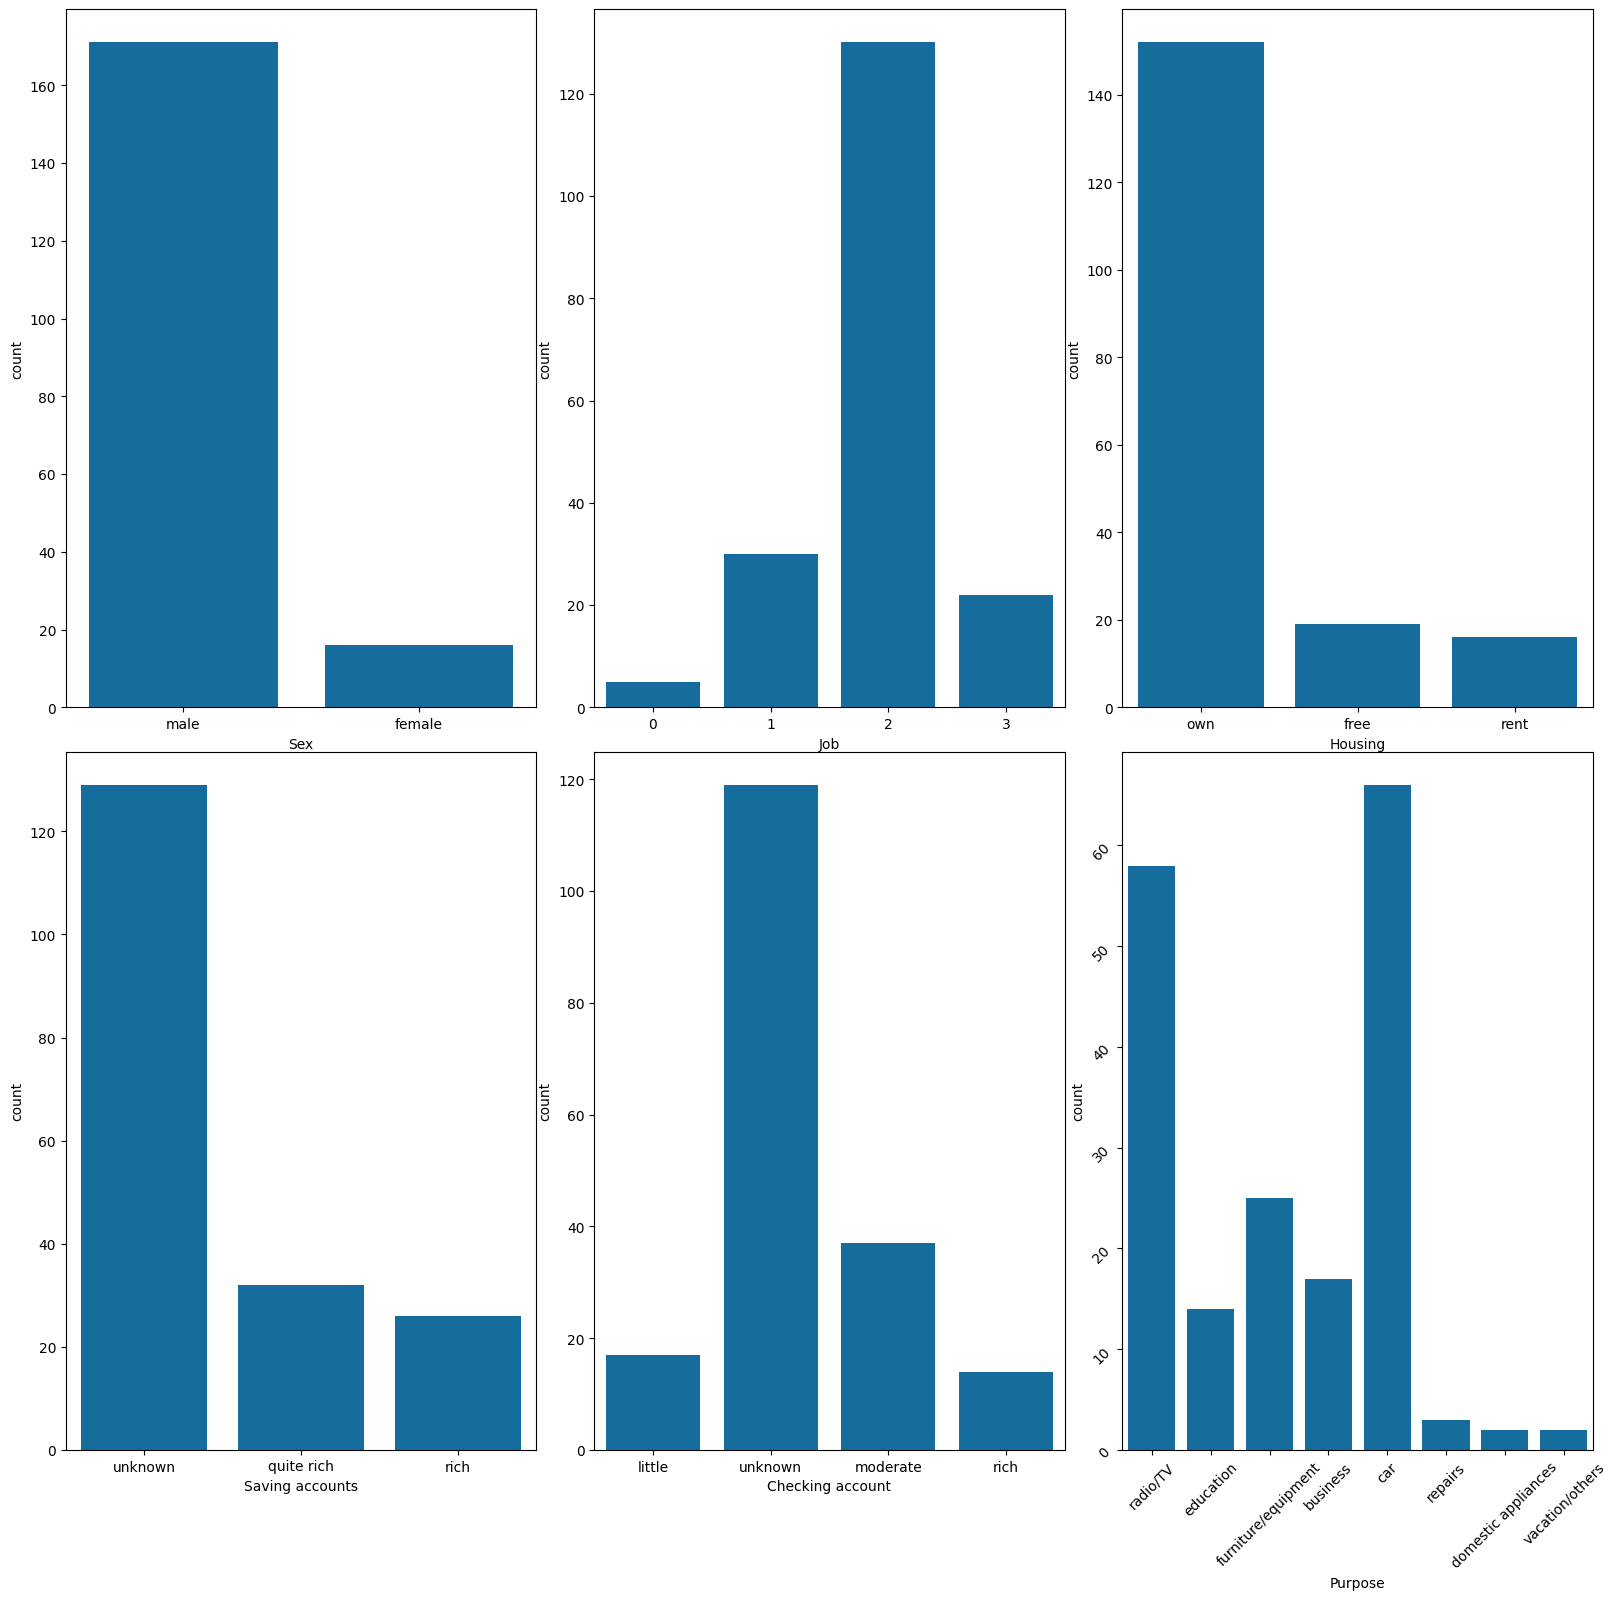

In [50]:
fig, ax = plt.subplots(2,3,figsize=(16,15))
plt.tight_layout()

sns.countplot(x ='Sex', data = df[df['Cluster']==2], ax=ax[0][0])
sns.countplot(x ='Job', data = df[df['Cluster']==2], ax=ax[0][1])
sns.countplot(x ='Housing', data = df[df['Cluster']==2], ax=ax[0][2])
sns.countplot(x ='Saving accounts', data = df[df['Cluster']==2], ax=ax[1][0])
sns.countplot(x ='Checking account', data = df[df['Cluster']==2], ax=ax[1][1])
sns.countplot(x ='Purpose', data = df[df['Cluster']==2], ax=ax[1][2].tick_params(labelrotation=45))
plt.show()

Cluster 3

<Axes: xlabel='count', ylabel='Age label'>

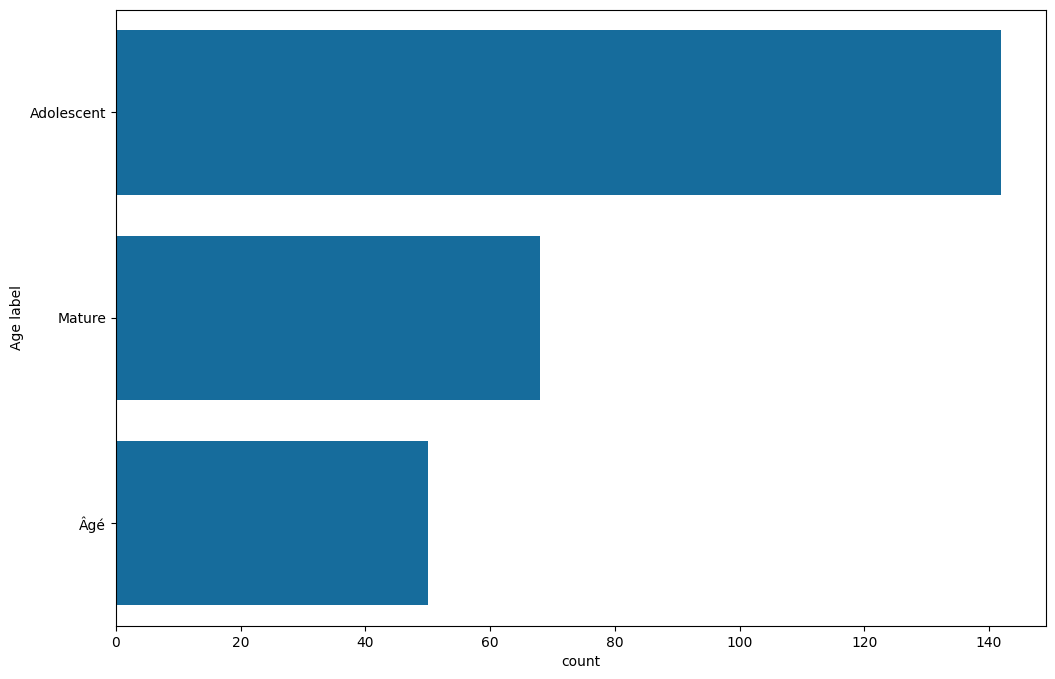

In [51]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Age label', data = df[df['Cluster']==3])

<Axes: xlabel='count', ylabel='Duration'>

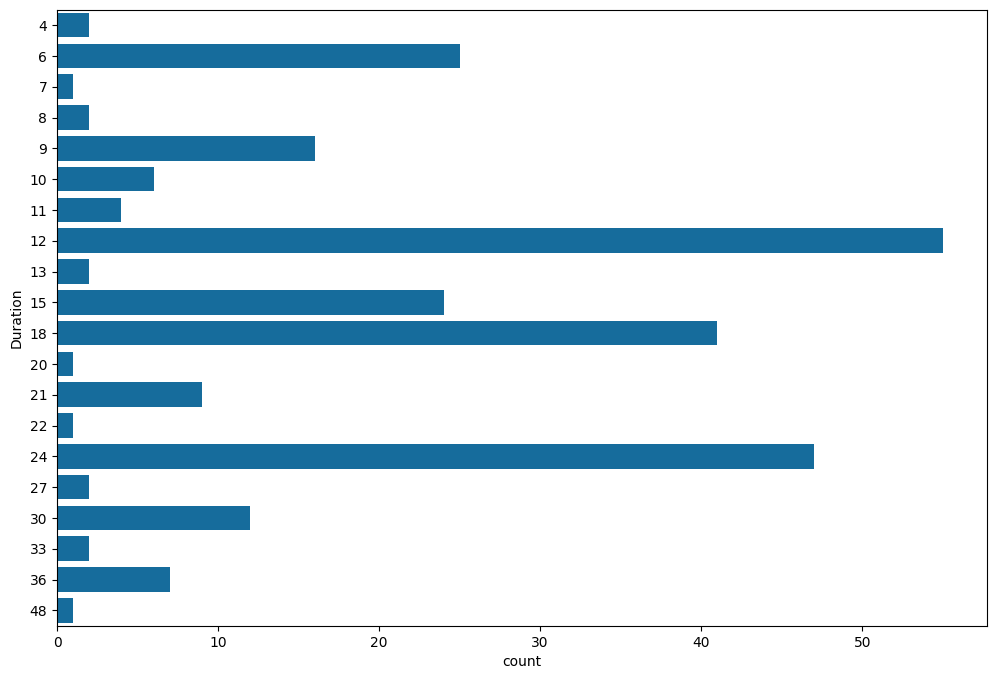

In [52]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y ='Duration', data = df[df['Cluster']==3])

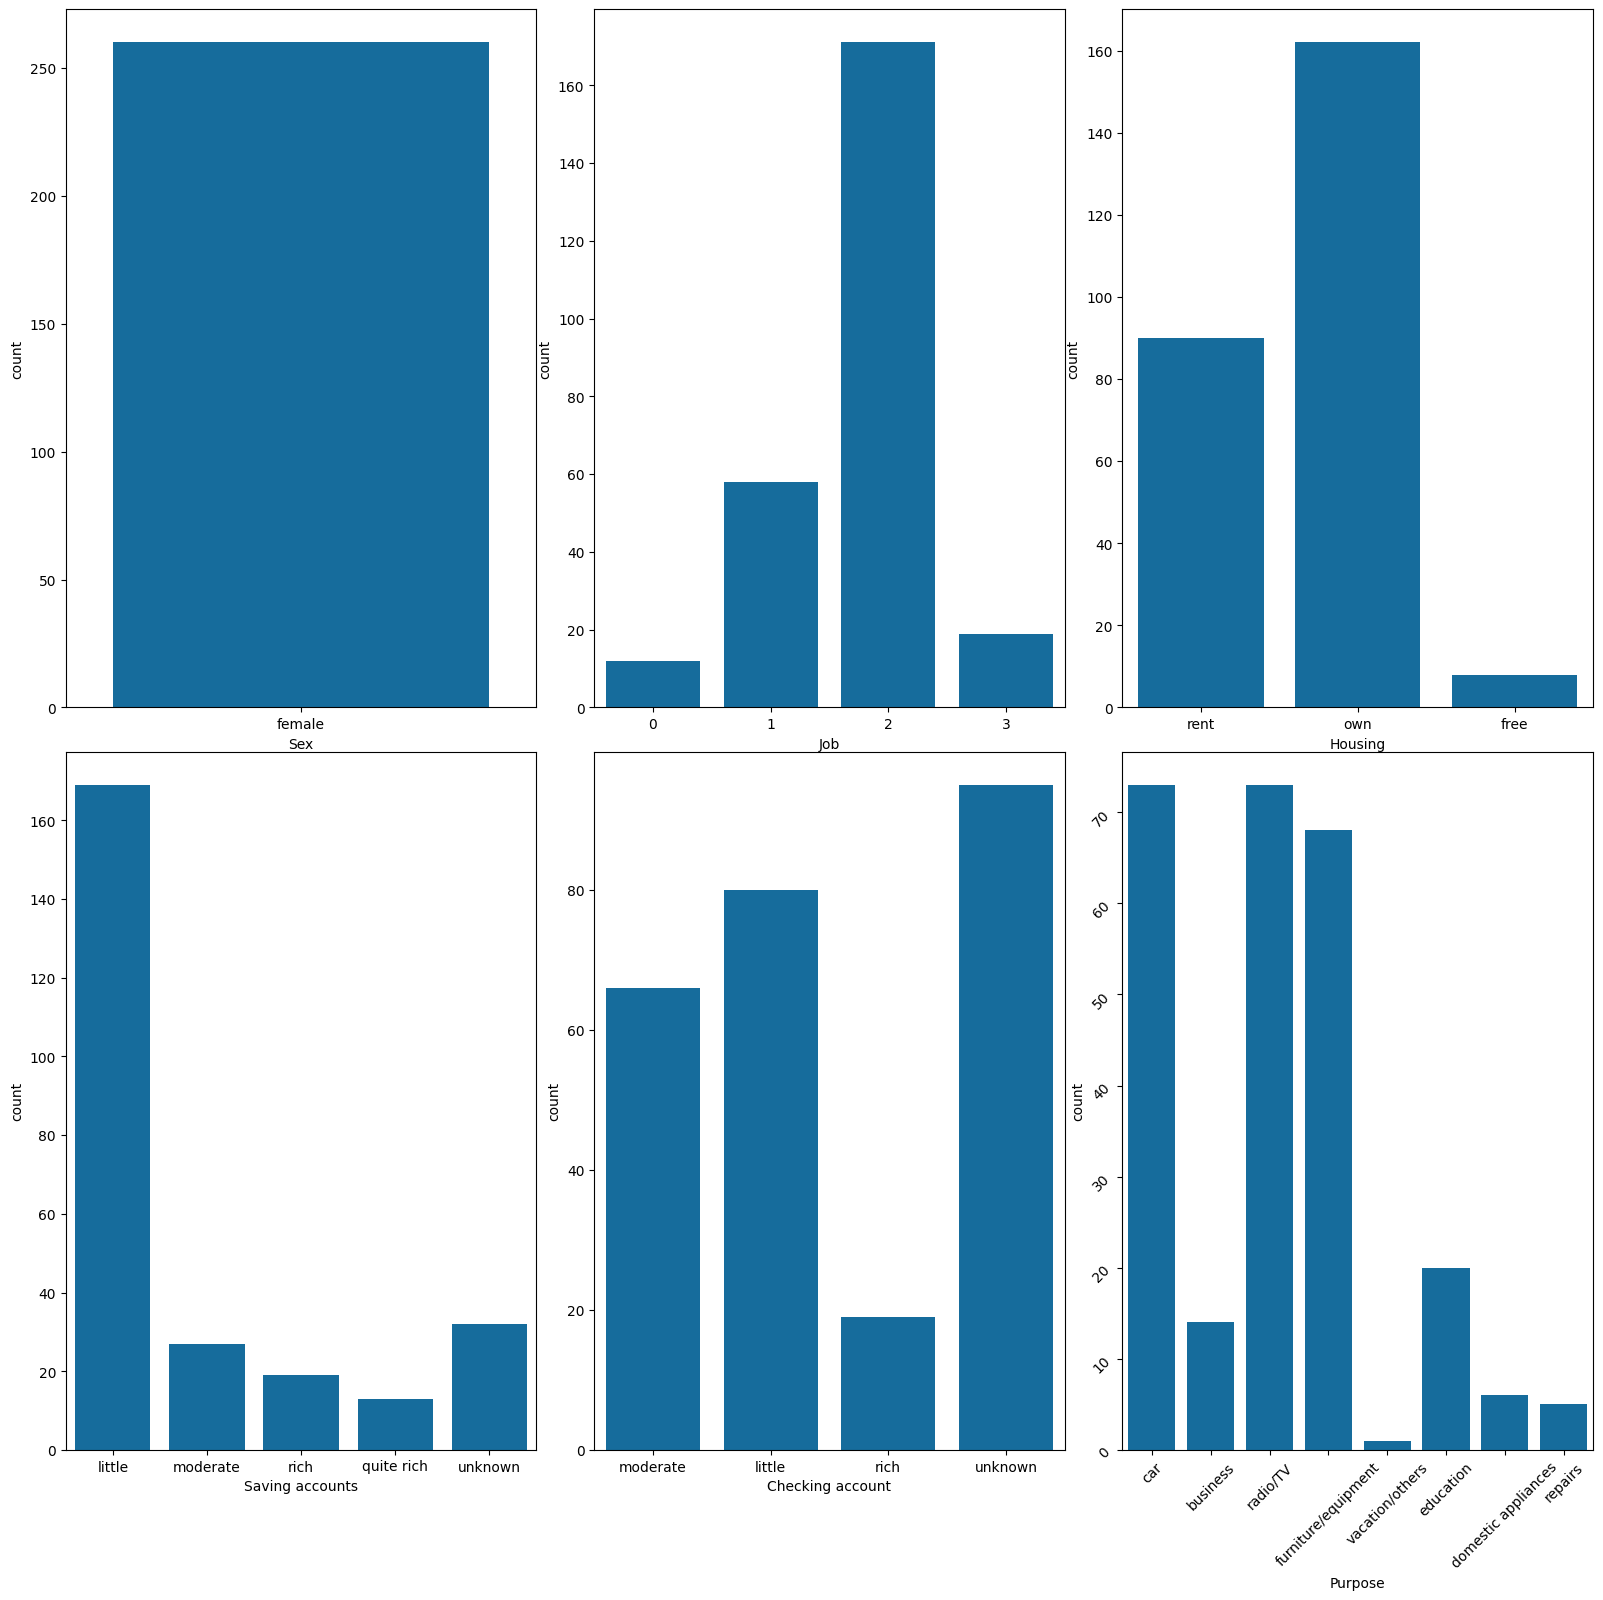

In [53]:
fig, ax = plt.subplots(2,3,figsize=(16,15))
plt.tight_layout()

sns.countplot(x ='Sex', data = df[df['Cluster']==3], ax=ax[0][0])
sns.countplot(x ='Job', data = df[df['Cluster']==3], ax=ax[0][1])
sns.countplot(x ='Housing', data = df[df['Cluster']==3], ax=ax[0][2])
sns.countplot(x ='Saving accounts', data = df[df['Cluster']==3], ax=ax[1][0])
sns.countplot(x ='Checking account', data = df[df['Cluster']==3], ax=ax[1][1])
sns.countplot(x ='Purpose', data = df[df['Cluster']==3], ax=ax[1][2].tick_params(labelrotation=45))
plt.show()

# Résumé de l'analyse des données
* Les données sont divisées en 4 clusters de types différents.
* Les clients de crédit sont âgés de 19 à 75 ans, avec une majorité entre 25 et 30 ans.
* La plupart des clients de crédit bancaire ont un niveau de travail 2 - Qualifié.
* La plupart des clients de crédit bancaire possèdent leur propre logement, dans une proportion largement dominante.
* Pour tous les clusters, les clients bancaires sont majoritairement des hommes.

> Cluster 0
Dominé par la tranche d'âge adolescents, avec des épargnes allant de little à rich, les montants de crédit et durées les plus faibles. L'objectif principal est l'achat d'une radio/TV ou d'une voiture. Ce cluster est dominé par les femmes.

> Cluster 1
C'est le cluster le plus important en nombre de clients, dominé par la tranche d'âge adultes, avec des épargnes de little à quite rich, les deuxièmes montants de crédit et durées les plus faibles. L'objectif principal est l'achat d'une radio/TV ou d'une voiture.

> Cluster 2  
C'est le plus petit cluster, dominé par les tranches d'âge adultes-seniors, avec un niveau de travail 3-Professionnel dominant après le niveau 2. Les épargnes vont de little à rich, avec les montants de crédit et durées les plus élevés, largement supérieurs aux autres clusters. L'objectif principal est l'achat d'une voiture, pour des raisons professionnelles ou une radio/TV.

> Cluster 3
Dominé par la tranche d'âge seniors, avec des épargnes de quite rich à rich et des comptes courants allant de unknown à little rich. Les montants de crédit et durées sont les deuxièmes plus faibles. L'objectif principal est l'achat d'une voiture, d'une radio/TV ou de meubles.